<a href="https://colab.research.google.com/github/heeyooon/TNT_2021_winter_team_3/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **반도체 박막 두께 분석 경진대회**
https://dacon.io/competitions/official/235554/overview/

## 대회 설명
**배경 자료**
반도체 박막은 얇은 반도체 막으로 박막의 종류와 두께는 반도체 소자의 특성을 결정짓는 중요한 요소 중 하나입니다. 박막의 두께를 측정하는 방법으로 반사율 측정이 널리 사용되며 반사율은 입사광 세기에 대한 반사광 세기의 비율로 정해집니다. (반사율 = 반사광/입사광) 반사율은 빛의 파장에 따라 변하며 파장에 따른 반사율의 분포를 반사율 스펙트럼이라고 합니다. 

**구조 설명**
이번 대회에서 분석할 소자는 질화규소(layer_1)/이산화규소(layer_2)/질화규소(layer_3)/이산화규소(layer_4)/규소(기판) 총 5층 구조로 되어 있습니다. 대회의 목적은 기판인 규소를 제외한 layer_1 ~ layer_4의 두께를 예측하는 것으로 train.csv 파일에는 각 층의 두께와 반사율 스펙트럼이 포함되어 있습니다. 

**데이터 설명**
train.csv 파일에는 4층 박막의 두께와 파장에 따른 반사율 스펙트럼이 주어집니다. 헤더의 이름에 따라 layer_1 ~ 4는 해당 박막의 두께,
0\~225은 빛의 파장에 해당하는 반사율이 됩니다. 헤더 이름인 0\~225은 파장을 뜻하며 비식별화 처리가 되어있어 실제 값과는 다릅니다.


## 과제 조건
1. 테스트 MAE를 5이하로 만들어보세요
2. Tensorflow와 Pytorch 버전 모두로 만들어보셔야합니다.
즉, 모델을 만들고 학습시켜본 코드가 Tensorflow 버전과 Pytorch버전 2개가 있어야합니다.

#**1. Data Load and Simple EDA**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train = pd.read_csv('/content/drive/Shareddrives/TNT/스터디/2021년 겨울방학/과제/5주차 과제/data/train.csv')
test = pd.read_csv('/content/drive/Shareddrives/TNT/스터디/2021년 겨울방학/과제/5주차 과제/data/test.csv')
submission = pd.read_csv('/content/drive/Shareddrives/TNT/스터디/2021년 겨울방학/과제/5주차 과제/data/sample_submission.csv')

In [4]:
test

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225
0,0,0.535410,0.520775,0.494087,0.465134,0.430339,0.401751,0.355986,0.326427,0.282340,0.216756,0.181081,0.128061,0.090104,0.071084,0.027930,0.025360,0.035067,0.084959,0.119919,0.167098,0.219223,0.264180,0.303416,0.359825,0.383026,0.437603,0.457129,0.511524,0.525033,0.544154,0.558287,0.588944,0.591619,0.604344,0.594368,0.616329,0.617499,0.616428,0.622483,...,0.608499,0.598381,0.586389,0.552573,0.527883,0.488114,0.445729,0.418668,0.354205,0.280794,0.201839,0.131517,0.062330,0.028610,0.008230,0.036909,0.076047,0.141627,0.219861,0.305271,0.402317,0.465201,0.527406,0.590492,0.637339,0.649940,0.692388,0.703576,0.714609,0.750994,0.748339,0.757575,0.768130,0.777062,0.769173,0.768253,0.738704,0.739460,0.702139,0.702238
1,1,0.351099,0.398179,0.413809,0.418529,0.433257,0.455410,0.451065,0.464230,0.476011,0.477219,0.480153,0.472766,0.477897,0.479871,0.449263,0.450770,0.426963,0.430181,0.404833,0.392706,0.363237,0.343717,0.335713,0.314341,0.315998,0.297495,0.287035,0.285863,0.260355,0.278014,0.287343,0.311354,0.308082,0.326284,0.344012,0.364763,0.415674,0.431457,0.457605,...,0.282865,0.247342,0.218508,0.192622,0.176362,0.177834,0.202651,0.233547,0.262714,0.279799,0.309807,0.361826,0.394869,0.445743,0.450590,0.500176,0.509348,0.527510,0.555326,0.554006,0.573417,0.571737,0.567435,0.565504,0.546848,0.543153,0.512139,0.481228,0.458004,0.415012,0.333931,0.276307,0.211513,0.159223,0.110982,0.083130,0.099780,0.145420,0.260501,0.343857
2,2,0.490537,0.435958,0.413428,0.355796,0.335777,0.299944,0.242745,0.210555,0.180739,0.169717,0.140995,0.135154,0.148676,0.157423,0.192680,0.198092,0.231736,0.271318,0.287700,0.318439,0.341857,0.354556,0.368073,0.387608,0.396274,0.384137,0.373089,0.376440,0.365251,0.362339,0.338969,0.334446,0.305304,0.294452,0.267052,0.222056,0.179539,0.153937,0.128803,...,0.625039,0.648118,0.667911,0.666281,0.678367,0.680844,0.703117,0.705182,0.710873,0.683992,0.688223,0.678797,0.652492,0.629479,0.623222,0.565390,0.536286,0.476455,0.430758,0.387187,0.314787,0.285794,0.246694,0.267691,0.320559,0.390549,0.476316,0.541130,0.618077,0.671256,0.709371,0.746826,0.781436,0.788292,0.828630,0.835166,0.845859,0.846032,0.836724,0.846779
3,3,0.051634,0.075802,0.133983,0.154546,0.209387,0.251700,0.287552,0.333000,0.340617,0.393592,0.395593,0.434982,0.452452,0.474573,0.485643,0.493653,0.499292,0.522628,0.538426,0.528165,0.525234,0.520464,0.517862,0.516856,0.505803,0.500806,0.482355,0.467268,0.473142,0.431643,0.419620,0.398908,0.359098,0.316537,0.281483,0.249556,0.211823,0.165437,0.138461,...,0.315134,0.370213,0.395653,0.443499,0.455095,0.495142,0.515139,0.537473,0.560510,0.575864,0.586124,0.612198,0.613693,0.618326,0.606939,0.614141,0.615549,0.608026,0.582855,0.579895,0.558670,0.515708,0.506560,0.455626,0.411034,0.356563,0.300022,0.236862,0.168320,0.121919,0.075046,0.056651,0.079884,0.147469,0.213112,0.298096,0.382823,0.489381,0.562383,0.599247
4,4,0.154031,0.201728,0.270414,0.283799,0.343050,0.340233,0.379244,0.378511,0.373017,0.364702,0.361612,0.324792,0.303544,0.260080,0.213303,0.175923,0.115428,0.079285,0.045183,0.013776,0.049571,0.070298,0.147067,0.188333,0.267400,0.327930,0.400379,0.463853,0.492871,0.525006,0.559372,0.596083,0.591871,0.604874,0.605171,0.624277,0.609818,0.597025,0.593711,...,0.783075,0.784513,0.737285,0.732940,0.679529,0.623679,0.551320,0.499520,0.413406,0.385228,0.379831,0.399972,0.443645,0.491499,0.561842,0.609885,0.641345,0.676475,0.693973,0.699555,0.711892,0.703251,0.700238,0.666234,0.663044,0.619070,0.555979,0.494927,0.415850,0.305639,0.255070,0.242396,0.271287,0.328828,0.397950,0.486436,0.530573,0.582752,0.637296,0.637238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [6]:
train.describe()

,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225
count,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,...,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000
mean,155.000000,155.000000,155.000000,155.000000,0.292653,0.292893,0.293125,0.293363,0.293666,0.293994,0.294344,0.294792,0.295325,0.295757,0.296188,0.296762,0.297396,0.298059,0.298745,0.299503,0.300220,0.301024,0.301834,0.302585,0.303395,0.304331,0.305255,0.306159,0.307080,0.307916,0.308737,0.309647,0.310584,0.311537,0.312403,0.313251,0.314086,0.314904,0.315711,0.316522,...,0.515799,0.516212,0.517059,0.518330,0.519609,0.520906,0.522183,0.523519,0.524838,0.526181,0.527548,0.528943,0.530954,0.533822,0.536751,0.539718,0.542706,0.545724,0.548767,0.551864,0.554950,0.558064,0.561231,0.565091,0.569481,0.574082,0.578907,0.583966,0.589218,0.594688,0.600336,0.606206,0.612238,0.618456,0.623942,0.625395,0.627100,0.628997,0.631166,0.633594
std,86.554468,86.554468,86.554468,86.554468,0.181642,0.181857,0.182055,0.182197,0.182361,0.182529,0.182693,0.182858,0.183057,0.183192,0.183337,0.183532,0.183731,0.183932,0.184135,0.184367,0.184559,0.184800,0.185021,0.185242,0.185466,0.185706,0.185972,0.186212,0.186465,0.186681,0.186877,0.187115,0.187331,0.187556,0.187732,0.187905,0.188082,0.188232,0.188361,0.188493,...,0.209915,0.209691,0.209475,0.209221,0.208968,0.208739,0.208539,0.208366,0.208186,0.208027,0.207935,0.207825,0.207651,0.207415,0.207167,0.206929,0.206699,0.206484,0.206228,0.205982,0.205727,0.205514,0.205216,0.204812,0.204335,0.203782,0.203131,0.202415,0.201604,0.200721,0.199727,0.198644,0.197473,0.196177,0.195028,0.194909,0.194730,0.194493,0.194146,0.193725
min,10.000000,10.000000,10.000000,10.000000,-0.014902,-0.014798,-0.014897,-0.014709,-0.014903,-0.014662,-0.014924,-0.014789,-0.014775,-0.014945,-0.014818,-0.014792,-0.014751,-0.014926,-0.014878,-0.014824,-0.014904,-0.014811,-0.014950,-0.014979,-0.014780,-0.014970,-0.014883,-0.015064,-0.014947,-0.014940,-0.014819,-0.014870,-0.014717,-0.014732,-0.014987,-0.014754,-0.014905,-0.014728,-0.014683,-0.014827,...,-0.014814,-0.015110,-0.014201,-0.014504,-0.014645,-0.014396,-0.014689,-0.014374,-0.014852,-0.014072,-0.014635,-0.014340,-0.014414,-0.014129,-0.013891,-0.014385,-0.014613,-0.013654,-0.014283,-0.014053,-0.014433,-0.013465,-0.010545,-0.014733,-0.014524,-0.014323,-0.013598,-0.012928,-0.012640,-0.012806,-0.011992,-0.008661,-0.011430,-0.009827,-0.007632,-0.007411,-0.007073,-0.007101,-0.005519,-0.006074
25%,80.000000,80.000000,80.000000,80.000000,0.135139,0.135180,0.135258,0.135478,0.135585,0.135705,0.135858,0.136423,0.136704,0.136993,0.137269,0.137756,0.138130,0.138556,0.139140,0.139715,0.140296,0.140825,0.141515,0.142154,0.142753,0.143431,0.144334,0.145081,0.145881,0.146606,0.147193,0.148069,0.

Text(0.5, 1.0, 'layer_4 heatmap')

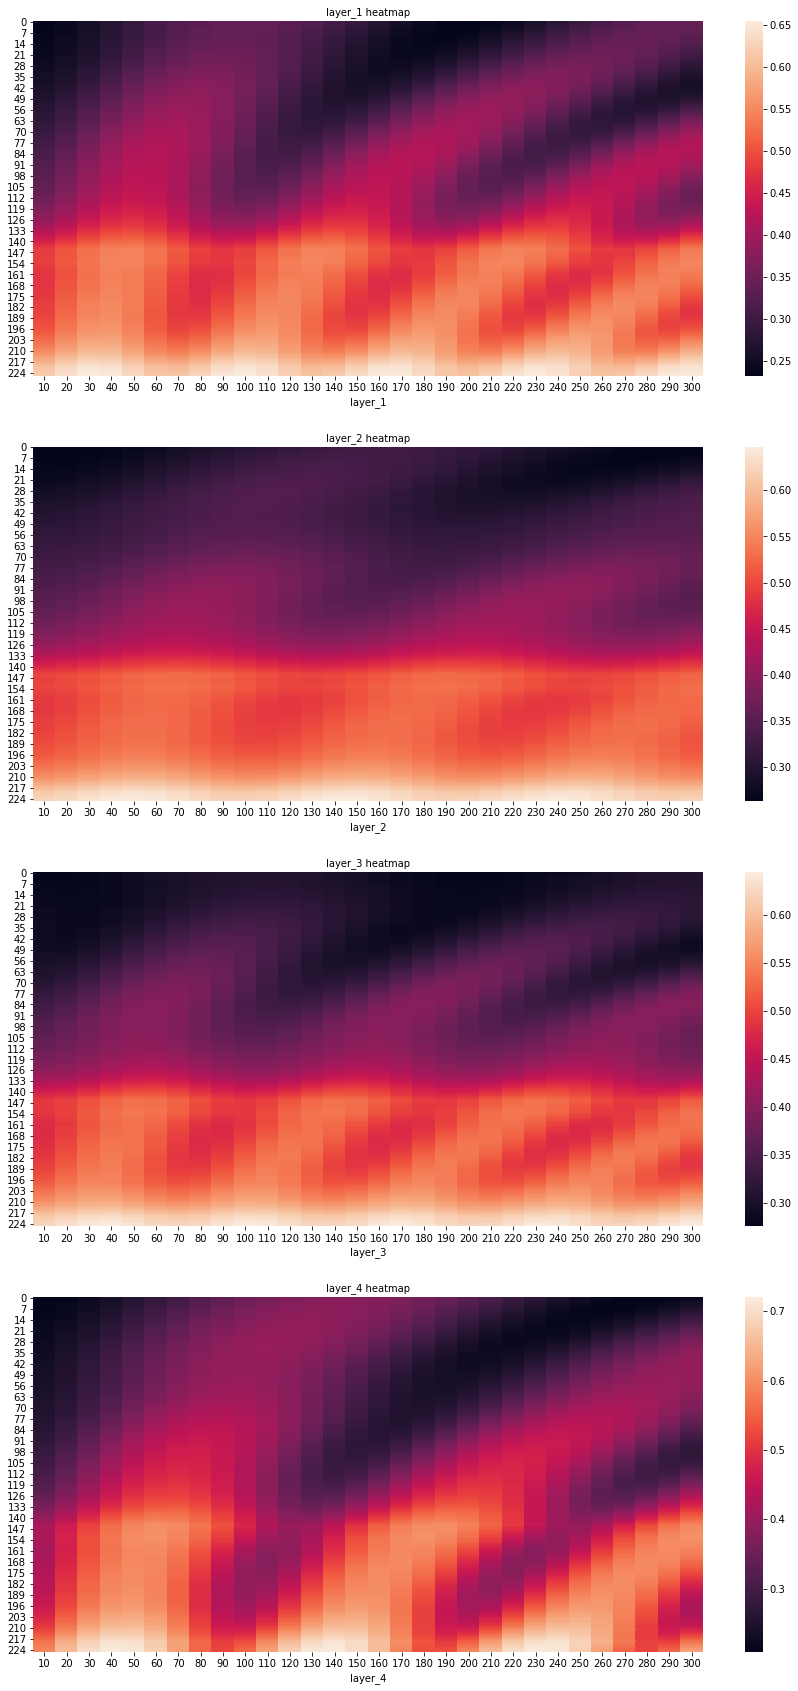

In [11]:
figure, ((ax1, ax2, ax3, ax4)) = plt.subplots(nrows = 4,ncols = 1)
figure.set_size_inches(15,30)

train_layer1 = train.drop(['layer_2','layer_3','layer_4'],axis=1).groupby(['layer_1']).mean()
train_layer2 = train.drop(['layer_1','layer_3','layer_4'],axis=1).groupby(['layer_2']).mean()
train_layer3 = train.drop(['layer_1','layer_2','layer_4'],axis=1).groupby(['layer_3']).mean()
train_layer4 = train.drop(['layer_1','layer_2','layer_3'],axis=1).groupby(['layer_4']).mean()

sns.heatmap(train_layer1.T,ax = ax1)
ax1.set_title('layer_1 heatmap',fontsize = 10)

sns.heatmap(train_layer2.T,ax = ax2)
ax2.set_title('layer_2 heatmap',fontsize = 10)

sns.heatmap(train_layer3.T,ax = ax3)
ax3.set_title('layer_3 heatmap',fontsize = 10)

sns.heatmap(train_layer4.T,ax = ax4)
ax4.set_title('layer_4 heatmap',fontsize = 10)

In [5]:
# train test split
X_train = train.iloc[:, 4:]
y_train = train.iloc[:, :4]

X_test = test.iloc[:, 1:]

print("X_train shape : ", X_train.shape)
print("Test shape : ", X_test.shape)

X_train shape :  (810000, 226)
Test shape :  (10000, 226)


#**2. Tensorflow version**

**Baseline model**
https://dacon.io/competitions/official/235554/codeshare/1229?page=1&dtype=recent&ptype=pub

In [10]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(220)
tf.random.set_seed(220)

In [24]:
model = Sequential()  # model 초기화 
model.add(Dense(units=160, activation='relu', input_dim = 226))  # 첫번째 은닉층  # 226개 feature, 160개 뉴런, relu 함수를 활성화 함수로 사용
model.add(Dense(units=160, activation='relu'))   # 두번째 은닉층  
model.add(Dense(units=160, activation='relu'))   # 세번째 은닉층
model.add(Dense(units=4, activation='linear'))   # 출력층 (4개의 output을 도출해내야되기 때문에 units = 4)

model.compile(loss='mae', optimizer='adam', metrics=['mae'])

In [29]:
history = model.fit(X_train, y_train, epochs = 200, batch_size=10000, validation_split = 0.05)

Epoch 1/200
77/77 [==============================] - 1s 11ms/step - loss: 37.1911 - mae: 37.1911 - val_loss: 50.5056 - val_mae: 50.5056
Epoch 2/200
77/77 [==============================] - 1s 8ms/step - loss: 37.1263 - mae: 37.1263 - val_loss: 49.3037 - val_mae: 49.3037
Epoch 3/200
77/77 [==============================] - 1s 8ms/step - loss: 36.9859 - mae: 36.9859 - val_loss: 50.6751 - val_mae: 50.6751
Epoch 4/200
77/77 [==============================] - 1s 8ms/step - loss: 36.9094 - mae: 36.9094 - val_loss: 49.7311 - val_mae: 49.7311
Epoch 5/200
77/77 [==============================] - 1s 9ms/step - loss: 36.8608 - mae: 36.8608 - val_loss: 49.1442 - val_mae: 49.1442
Epoch 6/200
77/77 [==============================] - 1s 9ms/step - loss: 36.7861 - mae: 36.7861 - val_loss: 50.2210 - val_mae: 50.2210
Epoch 7/200
77/77 [==============================] - 1s 9ms/step - loss: 36.7551 - mae: 36.7551 - val_loss: 49.6559 - val_mae: 49.6559
Epoch 8/200
77/77 [==============================] - 1

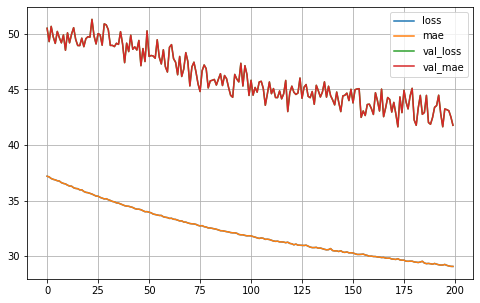

In [31]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.show()

**Add Dense, BatchNormarlization...**

In [33]:
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

model = Sequential()  # model 초기화 
model.add(Dense(units = 565, activation = 'relu', input_dim = 226))
model.add(BatchNormalization())
model.add(Dense(units = 452, activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(units = 339, activation='relu'))
model.add(BatchNormalization()) 
model.add(Dense(units = 226, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization()) 
model.add(Dense(units = 113, activation='relu'))
model.add(Dense(units = 4, activation='linear'))

model.compile(loss='mae', optimizer='adam', metrics=['mae'])
## adagrad :: loss : 61.4440 - mae : 61.4440 - val_loss: 78.2456 - val_mae: 78.2455
## adam ::  loss: 6.9269 - mae: 6.9269 - val_loss: 18.6828 - val_mae: 18.6828
## SGD :: loss: 11.5733 - mae: 11.5733 - val_loss: 26.2211 - val_mae: 26.2211


In [34]:
history = model.fit(X_train, y_train, epochs = 200, batch_size = 10000, validation_split = 0.05)

Epoch 1/200
77/77 [==============================] - 2s 20ms/step - loss: 143.6353 - mae: 143.6353 - val_loss: 140.9231 - val_mae: 140.9231
Epoch 2/200
77/77 [==============================] - 1s 16ms/step - loss: 70.9731 - mae: 70.9731 - val_loss: 115.9174 - val_mae: 115.9174
Epoch 3/200
77/77 [==============================] - 1s 16ms/step - loss: 61.0305 - mae: 61.0305 - val_loss: 121.8508 - val_mae: 121.8508
Epoch 4/200
77/77 [==============================] - 1s 16ms/step - loss: 55.7412 - mae: 55.7412 - val_loss: 108.7581 - val_mae: 108.7581
Epoch 5/200
77/77 [==============================] - 1s 16ms/step - loss: 49.4465 - mae: 49.4465 - val_loss: 92.7582 - val_mae: 92.7582
Epoch 6/200
77/77 [==============================] - 1s 16ms/step - loss: 45.2965 - mae: 45.2965 - val_loss: 70.8203 - val_mae: 70.8203
Epoch 7/200
77/77 [==============================] - 1s 16ms/step - loss: 38.6164 - mae: 38.6164 - val_loss: 60.3277 - val_mae: 60.3277
Epoch 8/200
77/77 [===================

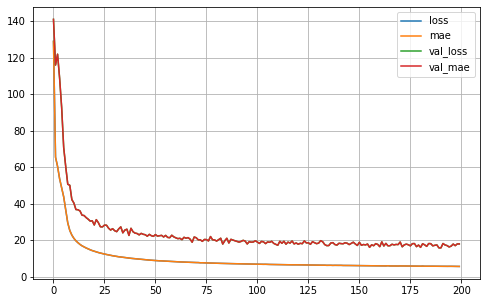

In [43]:
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.show()

In [42]:
pred_test = model.predict(X_test)
pred_test
submission.iloc[:, 1:] = pred_test
submission.to_csv('0129_submission1.csv', index = False)

## submission score : 3.71221

# **3. Pytorch version**

In [6]:
import torch
import torch.nn as nn
from torch import optim

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [8]:
X_train_torch = torch.tensor(X_train.values, device=device)
y_train_torch = torch.tensor(y_train.values, device=device)
X_train_torch

tensor([[0.2546, 0.2588, 0.2547,  ..., 0.4432, 0.4334, 0.4655],
        [0.2051, 0.2255, 0.2178,  ..., 0.6260, 0.6532, 0.6379],
        [0.1892, 0.1659, 0.1777,  ..., 0.7460, 0.7374, 0.7504],
        ...,
        [0.2570, 0.2363, 0.1855,  ..., 0.6107, 0.5098, 0.3838],
        [0.2137, 0.1770, 0.1258,  ..., 0.2597, 0.1537, 0.1295],
        [0.1453, 0.0947, 0.0685,  ..., 0.2233, 0.3503, 0.5000]],
       device='cuda:0', dtype=torch.float64)

In [25]:
from torch.utils.data import  TensorDataset, DataLoader
tensor_dataset = TensorDataset(X_train_torch, y_train_torch)
loader = DataLoader(tensor_dataset, batch_size= 10000, shuffle=True)

In [26]:
model = nn.Sequential(
    nn.Linear(226, 565), # hidde layer 1
    nn.ReLU(),
    nn.BatchNorm1d(565),
    nn.Linear(565, 452), # hidde layer 2
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.BatchNorm1d(452),
    nn.Linear(452, 339), # hidde layer 3
    nn.ReLU(),
    nn.BatchNorm1d(339),
    nn.Linear(339, 226), # hidde layer 4
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.BatchNorm1d(226),
    nn.Linear(226, 113), # hidde layer 5
    nn.Linear(113, 4) # hidde layer 6
)

loss_fn = nn.L1Loss()
optimizer = optim.Adam(model.parameters())

model = model.to(device)

In [27]:
EPOCHS = 200
losses = []

for epoch in range(EPOCHS+1):
  for X_batch_train, y_batch_train in loader:
    optimizer.zero_grad()
    
    y_pred = model(X_batch_train.float()) # forward 연산
    loss = loss_fn(y_pred, y_batch_train.float())
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
  print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, EPOCHS, loss.item()))

Epoch    0/200 Cost: 113.769722
Epoch    1/200 Cost: 62.244011
Epoch    2/200 Cost: 61.222256
Epoch    3/200 Cost: 61.082630
Epoch    4/200 Cost: 55.379448
Epoch    5/200 Cost: 49.312069
Epoch    6/200 Cost: 47.240742
Epoch    7/200 Cost: 44.195412
Epoch    8/200 Cost: 37.067974
Epoch    9/200 Cost: 32.542473
Epoch   10/200 Cost: 24.688087
Epoch   11/200 Cost: 22.162603
Epoch   12/200 Cost: 20.339094
Epoch   13/200 Cost: 19.264984
Epoch   14/200 Cost: 18.332050
Epoch   15/200 Cost: 17.829105
Epoch   16/200 Cost: 17.120268
Epoch   17/200 Cost: 17.063583
Epoch   18/200 Cost: 16.617992
Epoch   19/200 Cost: 16.119085
Epoch   20/200 Cost: 15.834706
Epoch   21/200 Cost: 15.687172
Epoch   22/200 Cost: 15.552799
Epoch   23/200 Cost: 14.757804
Epoch   24/200 Cost: 14.901909
Epoch   25/200 Cost: 14.587977
Epoch   26/200 Cost: 14.592145
Epoch   27/200 Cost: 14.670968
Epoch   28/200 Cost: 14.052209
Epoch   29/200 Cost: 13.663168
Epoch   30/200 Cost: 13.720593
Epoch   31/200 Cost: 13.802337
Epoch  

In [28]:
## make testset for pytorch model
test_torch = torch.tensor(X_test.values, device=device)

In [29]:
test_pred = model(test_torch.float())

## covert dtype gpu tensor to numpy
test_pred_np = test_pred.cpu()
test_pred_np = test_pred_np.detach().numpy()

submission.iloc[:, 1:] = test_pred_np
submission.to_csv('0130_submission2.csv', index = False)

### batch-size 1024, epoch 100 submission score : 3.7122196992
### batch-size 10000, epoch 200 submission score : 9.1400869217